In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

CREDIT CARD APPROVAL PREDICTION DATASET OVERVIEW

The application_record.csv dataset provides a comprehensive overview of client applications for financial services. It includes personal, financial, and employment information that can be used to assess creditworthiness. Each entry represents a unique client identified by a number and includes various attributes that can be leveraged to predict potential loan repayment behaviors.

Dataset 1
ID: Unique identifier for each client.
CODE_GENDER: Gender of the client.
FLAG_OWN_CAR: Whether the client owns a car.
FLAG_OWN_REALTY: Whether the client owns property.
CNT_CHILDREN: The number of children the client has.
AMT_INCOME_TOTAL: The total annual income of the client.
NAME_INCOME_TYPE: The category of the client's income source.
NAME_EDUCATION_TYPE: The highest education level the client has achieved.
NAME_FAMILY_STATUS: The marital status of the client.
NAME_HOUSING_TYPE: The client's living situation.
DAYS_BIRTH: The client's age in days, counted backwards from the current day.
DAYS_EMPLOYED: How long the client has been employed, counted backwards from the current day. Positive numbers indicate unemployment.
FLAG_MOBIL: Whether the client owns a mobile phone.
FLAG_WORK_PHONE: Whether the client has a work phone.
FLAG_PHONE: Whether the client has a phone.
FLAG_EMAIL: Whether the client has an email address.
OCCUPATION_TYPE: The client's occupation.
CNT_FAM_MEMBERS: The size of the client's family.

The credit_record.csv dataset tracks the credit history of clients, with each record reflecting a monthly snapshot of an individual's credit file.

Dataset 2
ID: Unique identifier for each client, matching the ID in the application_record.csv.
MONTHS_BALANCE: The month of the record relative to the current month (0 is current, -1 is previous month, etc.).
STATUS: The status of the client's credit for that month (e.g., no overdue, days past due, paid off).
This dataset is used to analyze a client's financial stability over time and is crucial for developing models that predict the likelihood of future loan repayment difficulties.

In [61]:
app_rec=pd.read_csv('application_record.csv')
cre_rec=pd.read_csv('credit_record.csv')

In [62]:
app_rec.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [63]:
app_rec.shape

(438557, 18)

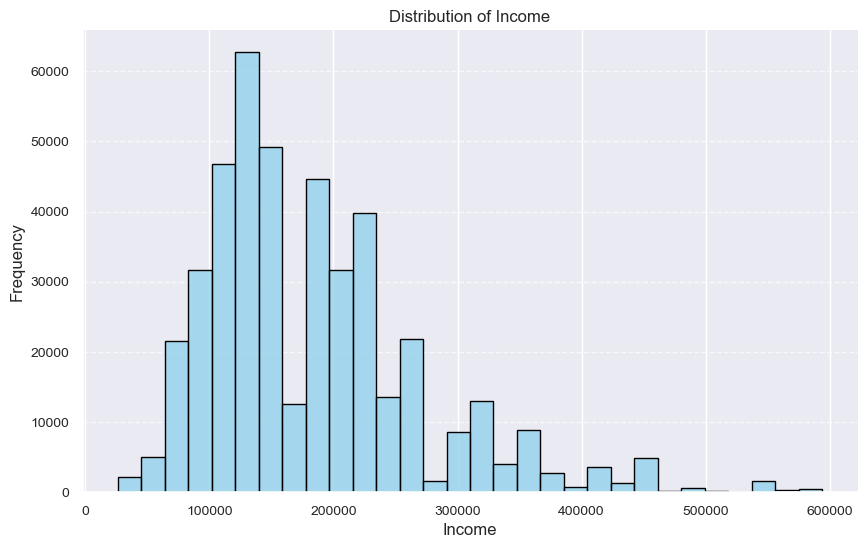

In [64]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=app_rec[app_rec['AMT_INCOME_TOTAL'] <= 600000], x='AMT_INCOME_TOTAL', bins=30,
                  color='skyblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

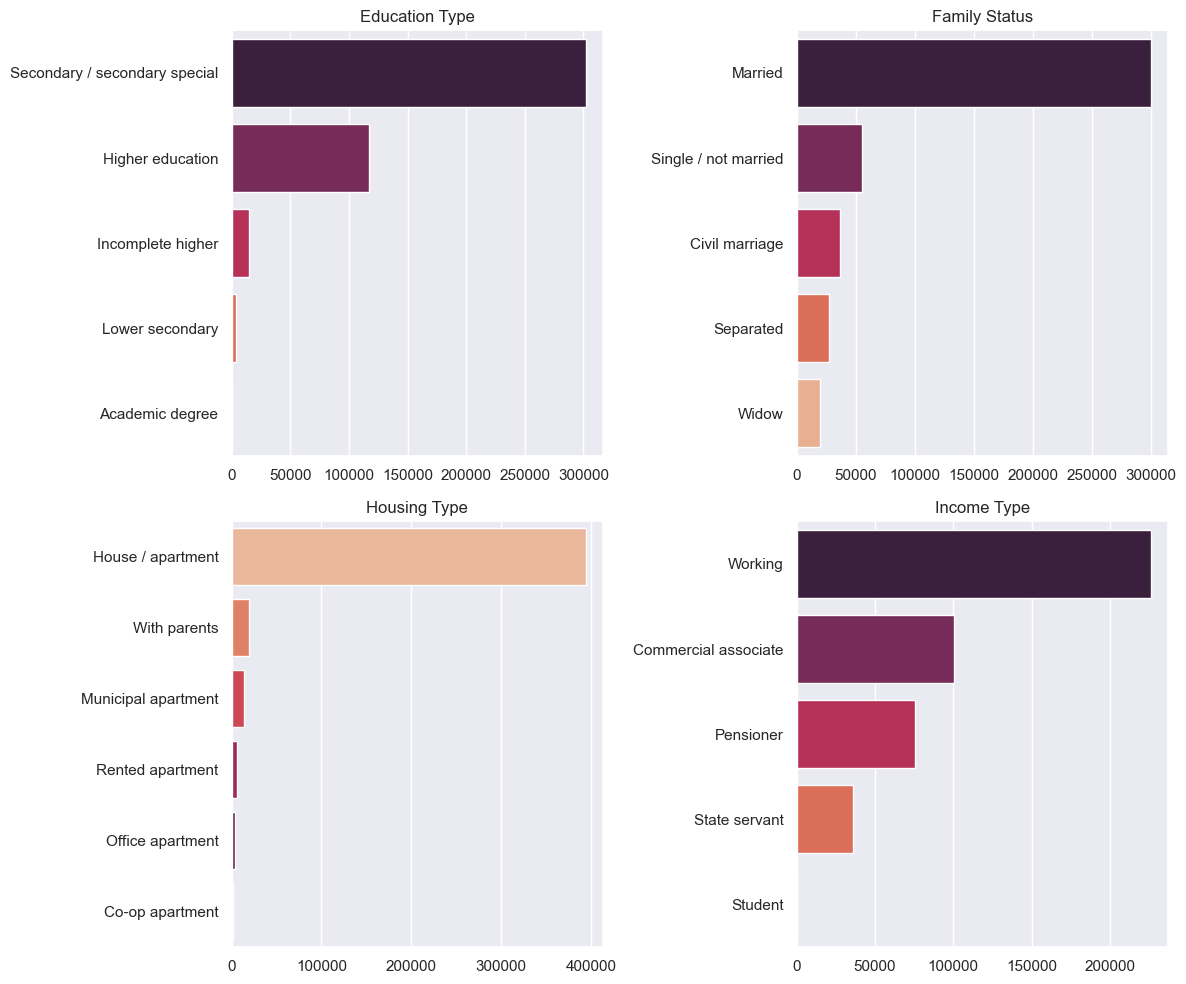

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(data=app_rec, x=app_rec['NAME_EDUCATION_TYPE'].value_counts().values, y=app_rec['NAME_EDUCATION_TYPE'].value_counts().index, ax=axs[0, 0],palette='rocket')
axs[0, 0].set_title('Education Type')

sns.barplot(data=app_rec, x=app_rec['NAME_FAMILY_STATUS'].value_counts().values, y=app_rec['NAME_FAMILY_STATUS'].value_counts().index, ax=axs[0, 1],palette='rocket')
axs[0, 1].set_title('Family Status')

sns.barplot(data=app_rec, x=app_rec['NAME_HOUSING_TYPE'].value_counts().values, y=app_rec['NAME_HOUSING_TYPE'].value_counts().index, ax=axs[1, 0],palette='rocket_r')
axs[1, 0].set_title('Housing Type')
sns.barplot(data=app_rec, x=app_rec['NAME_INCOME_TYPE'].value_counts().values, y=app_rec['NAME_INCOME_TYPE'].value_counts().index, ax=axs[1, 1],palette='rocket')
axs[1, 1].set_title('Income Type')
plt.tight_layout()
plt.show()

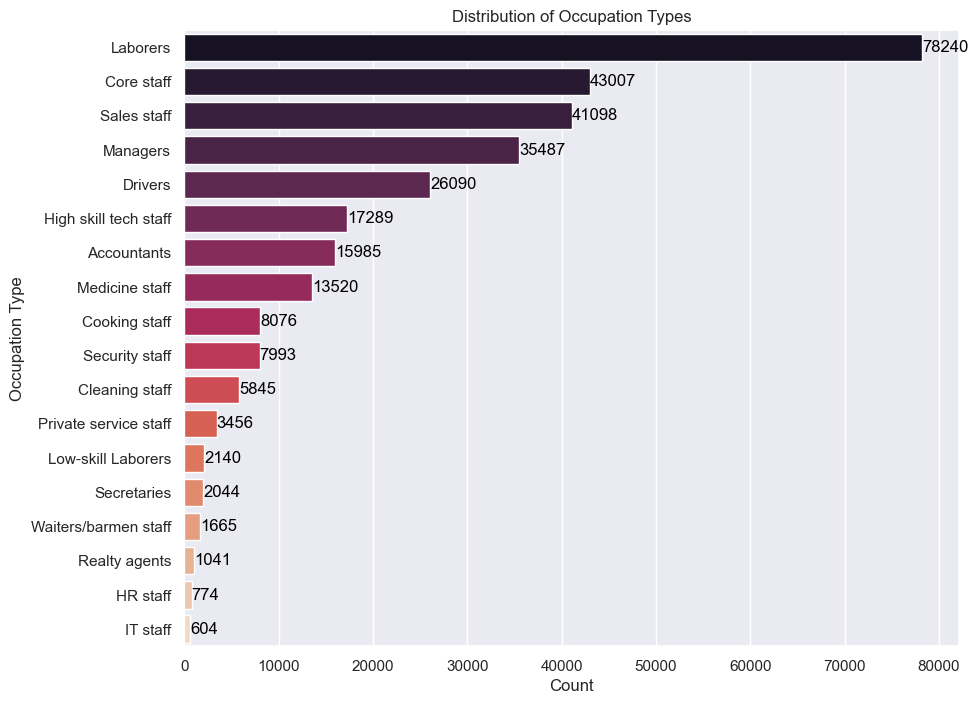

In [66]:
plt.figure(figsize=(10, 8))

sns.barplot(data=app_rec,
            y=app_rec['OCCUPATION_TYPE'].value_counts().index,
            x=app_rec['OCCUPATION_TYPE'].value_counts().values,
            palette='rocket')

ax = plt.gca()
for i, v in enumerate(app_rec['OCCUPATION_TYPE'].value_counts().values):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.title('Distribution of Occupation Types')

plt.show()

In [67]:
cre_rec.tail(5)

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [68]:
cre_rec.shape

(1048575, 3)

In [69]:
cre_rec.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [70]:
df = pd.merge(app_rec, cre_rec, on='ID',how='left')

In [71]:
df.drop(columns=['ID','FLAG_MOBIL','FLAG_WORK_PHONE'], inplace=True)
df.sample(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
639391,F,N,N,0,72000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-23147,365243,1,0,NaN,1.0,-12.0,C
443234,M,Y,Y,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-10796,-2531,0,0,Laborers,4.0,-7.0,0
300769,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-14065,-786,0,0,Laborers,2.0,NaN,NaN
671924,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-18402,-714,0,0,Core staff,2.0,-1.0,C
281569,F,N,Y,0,360000.0,Working,Secondary / secondary special,Married,House / apartment,-14687,-2463,1,0,Cooking staff,2.0,-52.0,0
1022876,M,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-17742,365243,0,0,NaN,2.0,NaN,NaN
21591,M,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-20931,-191,1,1,Security staff,2.0,-52.0,0
368628,F,Y,Y,1,103500.0,Working,Higher education,Married,House / apartment,-10024,-1663,0,1,Sales staff,3.0,-3.0,X
706630,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-11288,-1904,1,0,Drivers,3.0,-16.0,0
1099514,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23919,365243,0,0,NaN,2.0,NaN,NaN


In [72]:
df.shape

(1179815, 17)

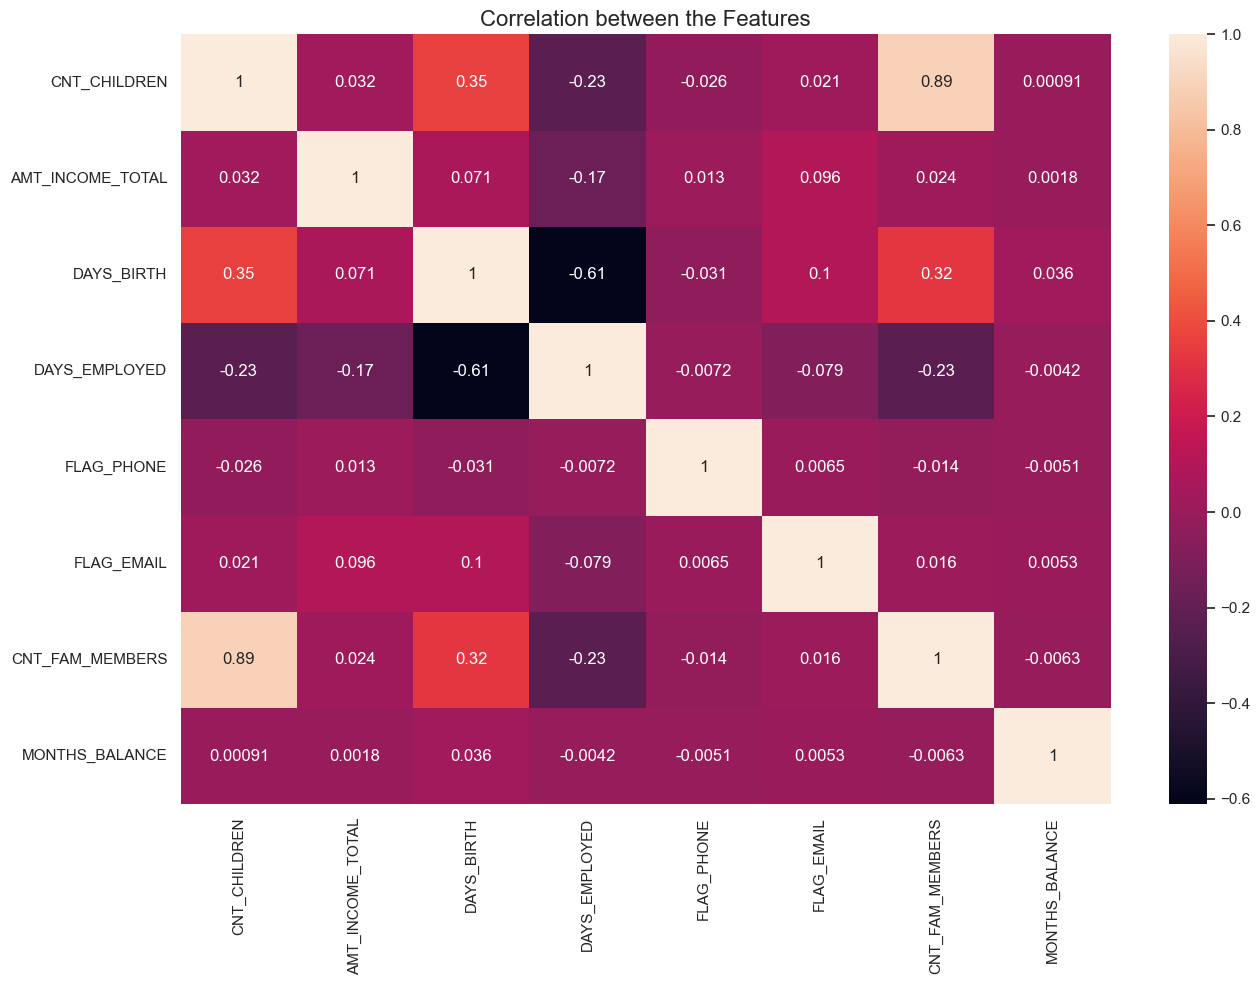

In [73]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [74]:
df['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,1179815.0,0.427756,0.738171,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,1179815.0,188216.313569,104844.453399,26100.0,121500.0,162000.0,225000.0,6750000.0
DAYS_BIRTH,1179815.0,-16082.344764,4131.929778,-25201.0,-19473.0,-15711.0,-12646.0,-7489.0
DAYS_EMPLOYED,1179815.0,58766.163060,137300.020010,-17531.0,-3242.0,-1617.0,-412.0,365243.0
FLAG_PHONE,1179815.0,0.296251,0.456603,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,1179815.0,0.097881,0.297153,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,1179815.0,2.203816,0.903505,1.0,2.0,2.0,3.0,20.0
MONTHS_BALANCE,777715.0,-19.373564,14.082208,-60.0,-29.0,-17.0,-8.0,0.0


In [76]:
df.STATUS = df.STATUS.map({"X":1,"C":1, "0":1, "1":0, "2":0, "3":0, "4":0, "5":0})
df.sample(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
587948,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9662,-831,0,0,Drivers,1.0,-32.0,1.0
798479,F,N,N,0,225000.0,Working,Higher education,Separated,With parents,-10923,-796,0,0,NaN,1.0,NaN,NaN
520116,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17441,-1222,1,0,Cooking staff,2.0,-1.0,1.0
763085,F,N,Y,0,360000.0,Working,Higher education,Separated,House / apartment,-18899,-8538,1,0,Managers,1.0,-10.0,1.0
120722,M,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,-10681,-2152,1,0,Sales staff,1.0,-2.0,1.0


In [77]:
df['STATUS'].value_counts()

1.0    766140
0.0     11575
Name: STATUS, dtype: int64

In [78]:
scaler=StandardScaler()
df[['AMT_INCOME_TOTAL']]=scaler.fit_transform(df[['AMT_INCOME_TOTAL']])

In [79]:
df.isnull().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

In [80]:
df = df.dropna(subset=['STATUS'])

In [81]:
# replace M & F as 0 & 1 
df['CODE_GENDER'].replace('M',0,inplace=True) #male -> 0
df['CODE_GENDER'].replace('F',1,inplace=True)#female -> 1
df['FLAG_OWN_CAR'].replace('Y',0,inplace=True)
df['FLAG_OWN_CAR'].replace('N',1,inplace=True)
df['FLAG_OWN_REALTY'].replace('Y',0,inplace=True)
df['FLAG_OWN_REALTY'].replace('N',1,inplace=True)

In [82]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('not known')


In [83]:
df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [84]:
df.head(4)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,0,0,0,0,2.282274,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,0,0,not known,2.0,0.0,1.0
1,0,0,0,0,2.282274,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,0,0,not known,2.0,-1.0,1.0
2,0,0,0,0,2.282274,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,0,0,not known,2.0,-2.0,1.0
3,0,0,0,0,2.282274,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,0,0,not known,2.0,-3.0,1.0


In [85]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH']/(-1*365)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED']/(-1*365)
df.tail(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
1176066,0,1,0,0,-0.722178,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,0,0,Laborers,1.0,-9.0,1.0
1176067,0,1,0,0,-0.722178,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,0,0,Laborers,1.0,-10.0,0.0
1176068,0,1,0,0,-0.722178,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,0,0,Laborers,1.0,-11.0,0.0
1176069,0,1,0,0,-0.722178,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,0,0,Laborers,1.0,-12.0,1.0
1176070,0,1,0,0,-0.722178,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,0,0,Laborers,1.0,-13.0,1.0


In [86]:
df['OCCUPATION_TYPE'].value_counts()

not known                240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [87]:
# one hot encoding
def one_hot_encode(df1, columns):
    for col in columns:
        one_hot = pd.get_dummies(df[col], drop_first=True)
        df1 = pd.concat([df1, one_hot], axis=1)
        df1 = df1.drop([col], axis=1)
    return df1

categories=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
df2 = one_hot_encode(df,categories)
df2.head(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,not known
0,0,0,0,0,2.282274,32.890411,12.443836,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,2.282274,32.890411,12.443836,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,2.282274,32.890411,12.443836,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,2.282274,32.890411,12.443836,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,2.282274,32.890411,12.443836,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

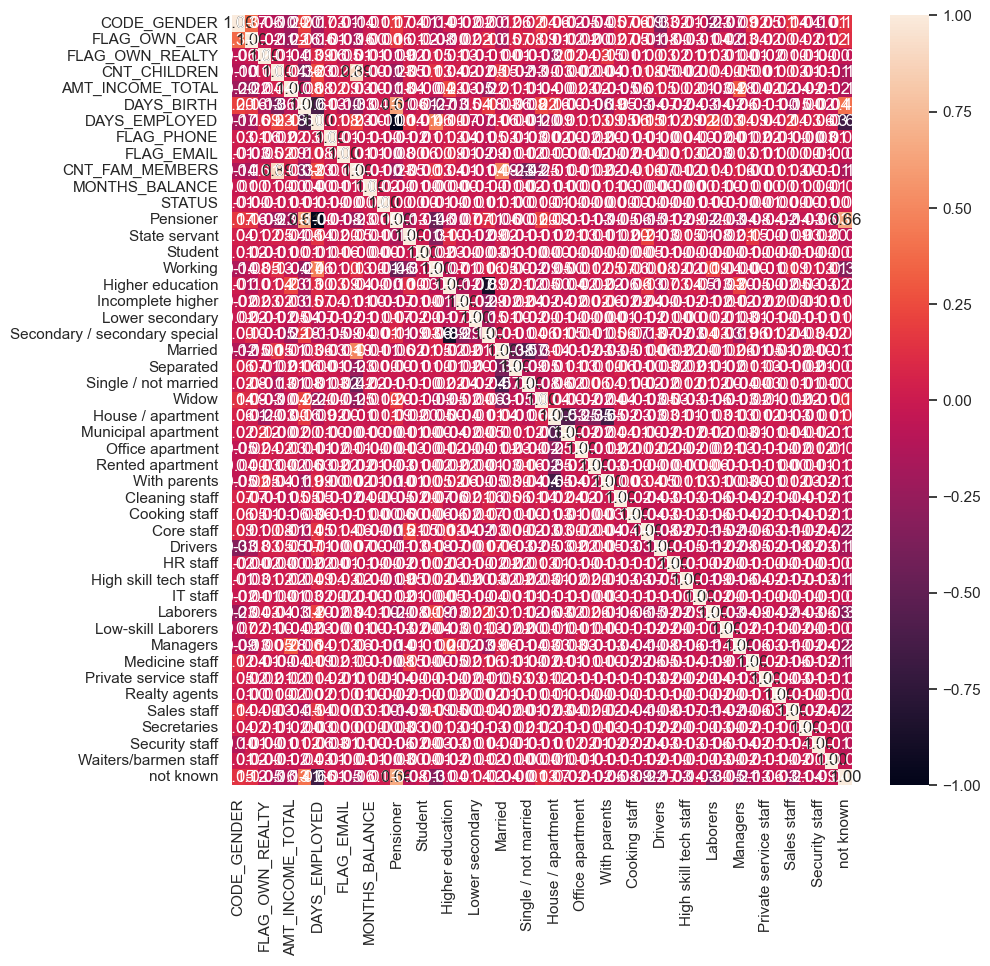

In [88]:
numerical_col=df2.select_dtypes('number').columns
numerical_coldf=df2.select_dtypes('number').columns
plt.figure(figsize=(10,10))
sns.heatmap(df2[numerical_col].corr(),cmap='rocket',fmt='.2f',annot=True,vmin=-1,vmax=1)

In [89]:
df2.drop(columns=['CNT_FAM_MEMBERS'], inplace=True)

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 1176070
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CODE_GENDER                    777715 non-null  int64  
 1   FLAG_OWN_CAR                   777715 non-null  int64  
 2   FLAG_OWN_REALTY                777715 non-null  int64  
 3   CNT_CHILDREN                   777715 non-null  int64  
 4   AMT_INCOME_TOTAL               777715 non-null  float64
 5   DAYS_BIRTH                     777715 non-null  float64
 6   DAYS_EMPLOYED                  777715 non-null  float64
 7   FLAG_PHONE                     777715 non-null  int64  
 8   FLAG_EMAIL                     777715 non-null  int64  
 9   MONTHS_BALANCE                 777715 non-null  float64
 10  STATUS                         777715 non-null  float64
 11  Pensioner                      777715 non-null  uint8  
 12  State servant                

In [91]:
# train test_split

X = df2.drop(columns=('STATUS'),axis=1)
y = df2.STATUS

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (622172, 45)
X_test : (155543, 45)
y_train : (622172,)
y_test : (155543,)


In [92]:
# Next, we will use the SMOTE algorithm to make up for the lack of data

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

The code snippet utilizes the Synthetic Minority Over-sampling Technique (SMOTE) algorithm from the imblearn library to address class imbalance in the dataset. SMOTE is a technique used to alleviate the effects of class imbalance by generating synthetic samples for the minority class. It works by creating synthetic examples along the line segments joining existing minority class instances. This helps in balancing the class distribution without simply duplicating existing samples, thus reducing the risk of overfitting.

In [93]:
# Let's compare the amount of data before and after the SMOTE algorithm. 
# As we can see, now the number of debtors 
# and people who have no debts (or do not have a credit history) are equal, 
# and we can safely train our model.

a = y_train.value_counts()
b = y_balanced.value_counts()
print(a, "\n\n", b)
c = y_test.value_counts()
d = y_test_balanced.value_counts()
print("\n\n",c, "\n\n", d)

1.0    612947
0.0      9225
Name: STATUS, dtype: int64 

 1.0    612947
0.0    612947
Name: STATUS, dtype: int64


 1.0    153193
0.0      2350
Name: STATUS, dtype: int64 

 1.0    153193
0.0    153193
Name: STATUS, dtype: int64


In [94]:
# X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
# X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)
model1 = LogisticRegression()
model1.fit(X_balanced,y_balanced)
y_pred = model1.predict(X_test_balanced)
print('Accuracy is : ',accuracy_score(y_test_balanced, y_pred))

Accuracy is :  0.7806296632352653


C:\Users\swapn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_pred))) 
confusion_mat = confusion_matrix(y_test_balanced,y_pred)
pre_score = precision_score(y_test_balanced,y_pred)
recall = recall_score(y_test_balanced,y_pred)
f1 = f1_score(y_test_balanced,y_pred)
print(confusion_mat)
print('Percision Score is {:.5}'.format(pre_score))
print('recall Score is {:.5}'.format(recall))
print('f1 Score is {:.5}'.format(f1))

Accuracy Score is 0.78063
[[124971  28222]
 [ 38990 114203]]
Percision Score is 0.80185
recall Score is 0.74548
f1 Score is 0.77264


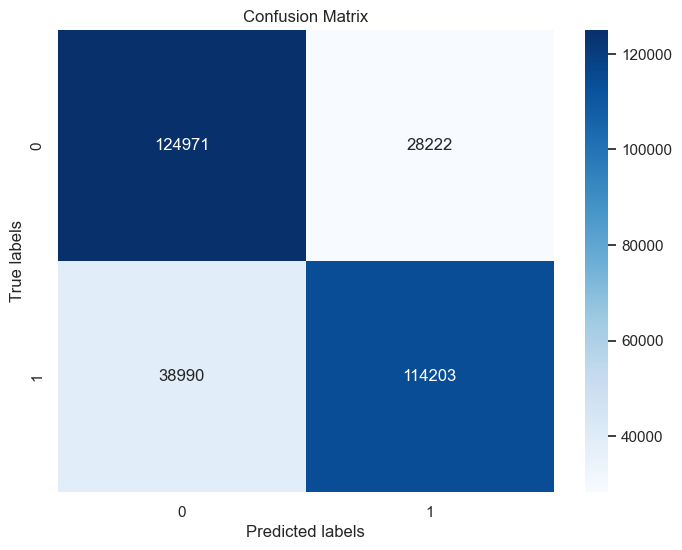

In [96]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_balanced, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [97]:
classifier2 = RandomForestClassifier()
classifier2.fit(X_balanced, y_balanced)
y_pred = classifier2.predict(X_test_balanced)
classifier2.score(X_test_balanced, y_test_balanced)

0.944364298629833

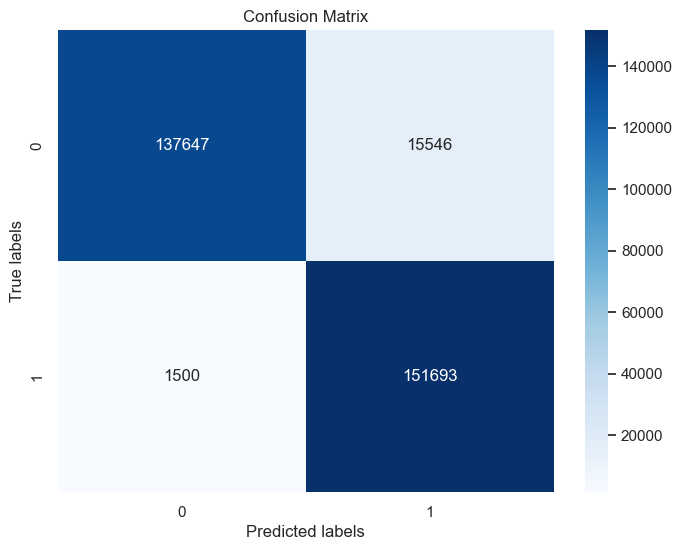

In [98]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_balanced, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [99]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_pred))) 
confusion_mat = confusion_matrix(y_test_balanced,y_pred)
pre_score = precision_score(y_test_balanced,y_pred)
recall = recall_score(y_test_balanced,y_pred)
f1 = f1_score(y_test_balanced,y_pred)
print(confusion_mat)
print('Percision Score is {:.5}'.format(pre_score))
print('recall Score is {:.5}'.format(recall))
print('f1 Score is {:.5}'.format(f1))

Accuracy Score is 0.94436
[[137647  15546]
 [  1500 151693]]
Percision Score is 0.90704
recall Score is 0.99021
f1 Score is 0.9468


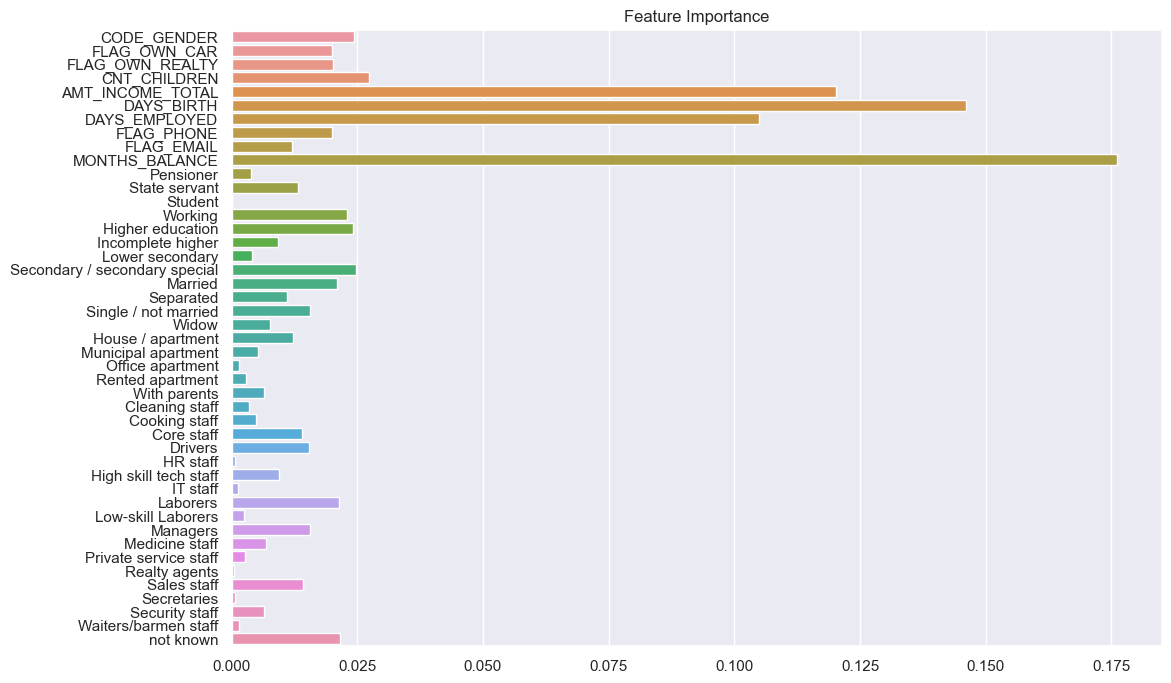

In [100]:
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=classifier2.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.show()

The feature importance curve is a graphical representation that shows the importance of each feature (or predictor variable) in a machine learning model. It helps to identify which features have the most significant impact on the model's predictions.

In the context of tree-based models like Random Forest, Gradient Boosting, and Decision Trees, feature importance is often calculated based on how frequently a feature is used to split the data across all the trees in the ensemble model or how much it decreases impurity (e.g., Gini impurity or entropy) in the splits.

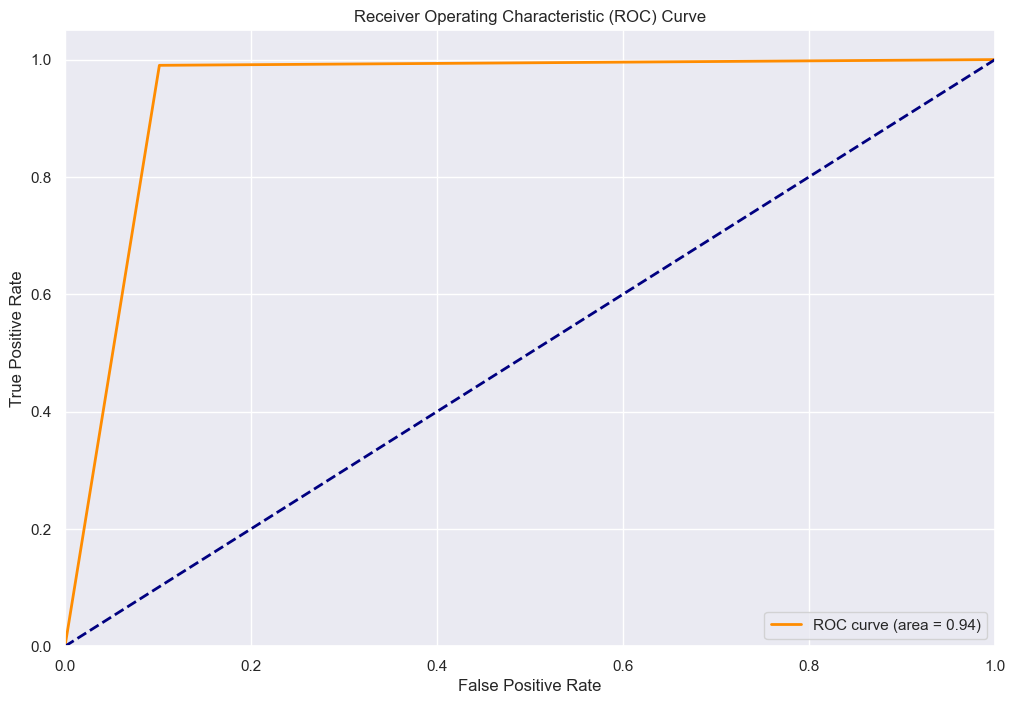

In [101]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_balanced, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In general, the Area Under the ROC Curve (AUC) value ranges from 0 to 1, where:

AUC = 0.5: Indicates that the classifier has no discrimination ability, essentially random guessing.
AUC > 0.5: Indicates that the classifier is better than random guessing (fair discrimination ability).
AUC = 1: Indicates perfect discrimination, where the classifier perfectly separates the positive and negative instances.